### Linear Regression Requirement & Assumption
#### 1. Linear Relationship
#### 2. No or Little Multicollinarity / use VIF value
#### 3. Normality of Residuals
#### 4. Homoscedasticity
#### 5. Independence of Errors

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
df = pd.read_csv('dataset.csv')

In [15]:
df.head(10)

,Feature_1,Feature_2,Feature_3,Output
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647
5,-0.889889,-1.580945,-0.422793,-77.897356
6,-2.685109,0.018421,1.722669,-75.231606
7,0.663188,0.185268,-1.883424,-57.492711
8,0.319196,-2.983970,-1.515216,-54.176286
9,-0.348368,-1.811019,0.746892,29.469835


In [16]:
x = df.iloc[:,:3].values
y = df.iloc[:,-1].values

### 1. Linear relationship
Plot the graph of indepedent variable and dependent variable.
Check the relationship between them.

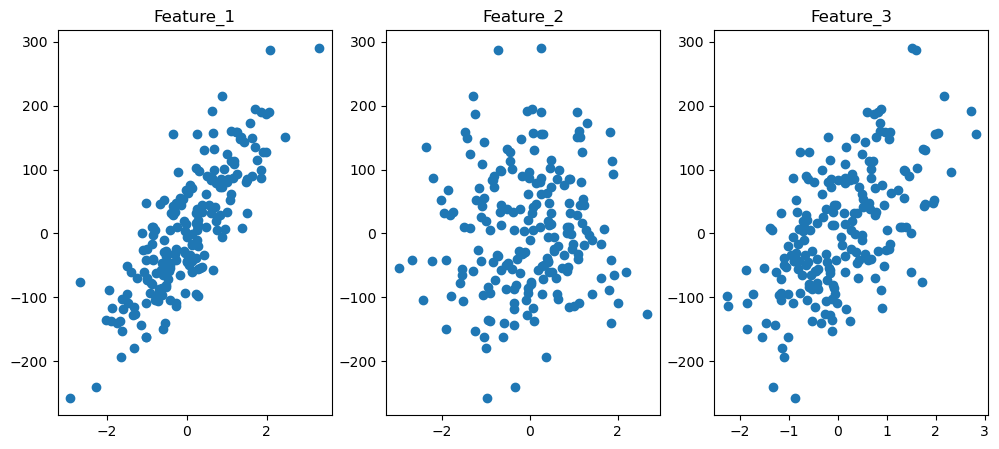

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

ax1.scatter(df['Feature_1'], df['Output'])
ax1.set_title("Feature_1")
ax2.scatter(df['Feature_2'], df['Output'])
ax2.set_title("Feature_2")
ax3.scatter(df['Feature_3'], df['Output'])
ax3.set_title("Feature_3")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### 2. Multicolinearity
Multicolinearity occurs when there is a high correlation between two or more independent vairables

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(3):
    vif.append(variance_inflation_factor(X_train, i))

In [19]:
for i in range(0,3):
    print(f" Vif value of Feature_{i+1} = {vif[i]}")

 Vif value of Feature_1 = 1.0019497109296474
 Vif value of Feature_2 = 1.0112734765884996
 Vif value of Feature_3 = 1.0112111183412935


In [20]:
print(vif)

[1.0019497109296474, 1.0112734765884996, 1.0112111183412935]


### 3.Normality of Residuals
Residuals = Observed_value - Predicted_value \
Normaly distributed residual is required for linear regression

In [21]:
residuals = y_test - y_pred

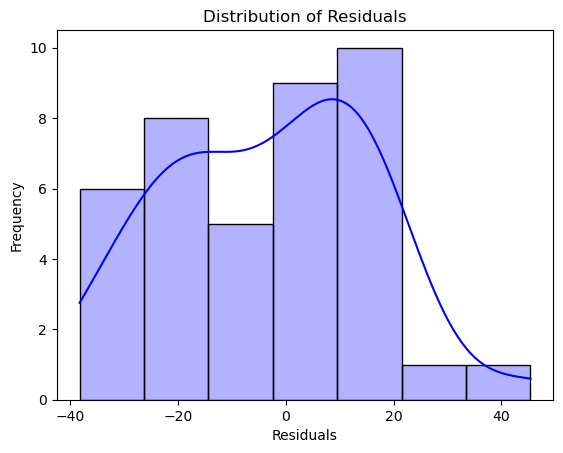

In [26]:
sns.histplot(residuals, kde=True, color='blue', alpha=0.3)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

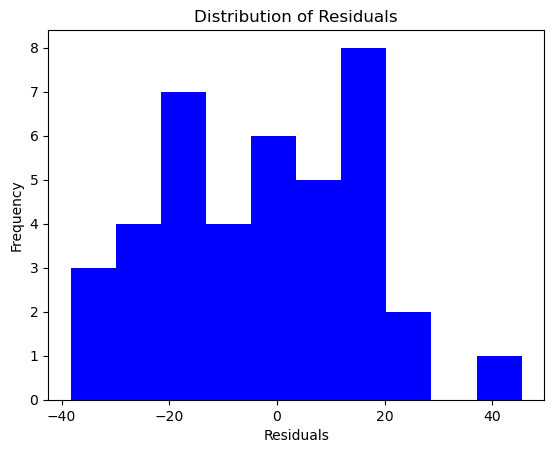

In [24]:
plt.hist(residuals, color='blue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

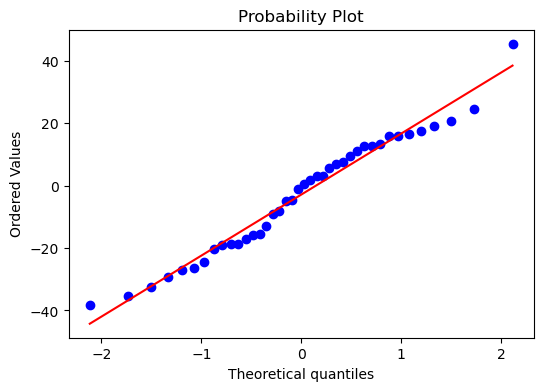

In [27]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residuals, plot=ax, fit=True)

plt.show()

### 4. Homoscedasticity
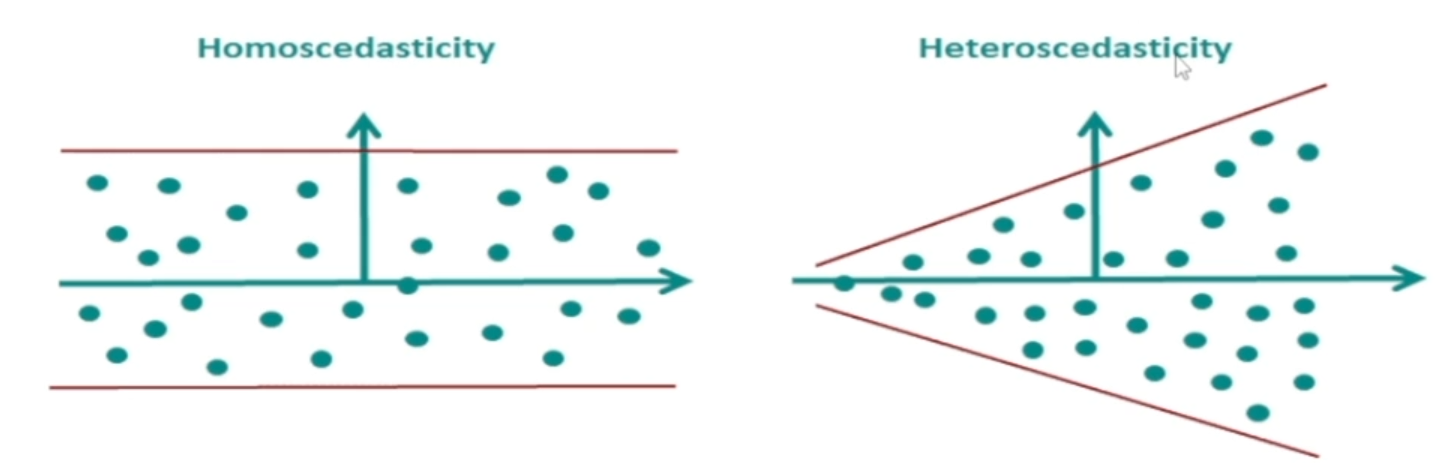
Variance of the residuals is constant across levels of the independent variables

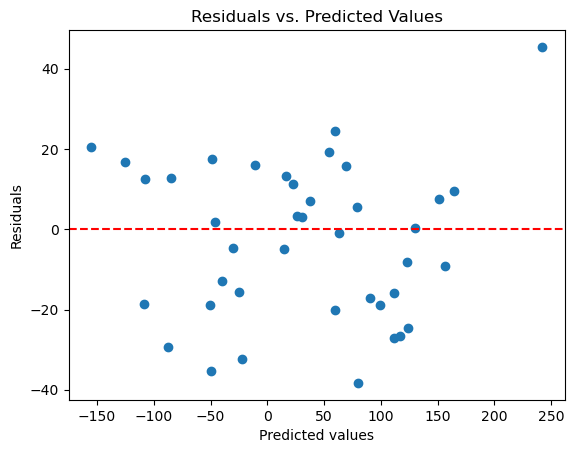

In [28]:
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

### Independence of Errors
The observation should be independent of each other. There should be bo systematic relationship or correlation between the residuals

In [31]:
print(residuals)

[-12.9468576  -17.2177114    1.7666951  -26.55847377  24.4780775
   0.3614319  -18.98969932 -29.27301617  -4.81896086  -4.71037205
 -20.15944225  17.4207831   15.91349788 -18.79615269  12.67530121
  19.20453732  12.55146308  16.65871368   3.01891603 -32.45534287
   9.48721704  11.21253811  -1.02932557  20.53565885 -38.29392096
  -8.074664    45.43650234 -27.11182967   7.63888043   7.05310593
  13.21010498 -18.59642181  15.86585837  -9.13475829   5.50138486
   3.21523431 -35.36080323 -24.62369183 -15.92736716 -15.58787501]


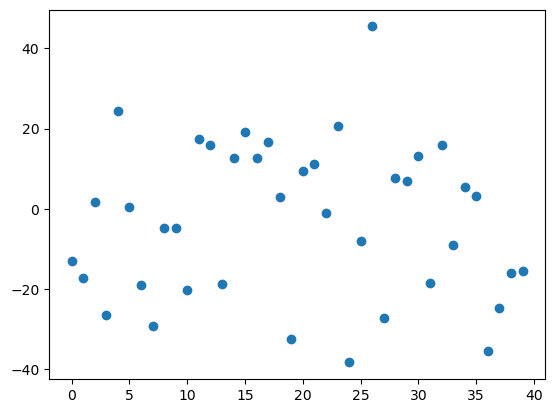

In [32]:
plt.scatter(list(range(len(residuals))),residuals)
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)

In [35]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ -40.32  -53.27]
 [  90.15   72.93]
 [ -46.16  -44.39]
 [ 116.6    90.04]
 [  59.21   83.69]
 [ 130.42  130.79]
 [ -50.8   -69.79]
 [ -87.31 -116.58]
 [  14.88   10.06]
 [ -29.99  -34.7 ]
 [  59.13   38.97]
 [ -48.73  -31.31]
 [ -10.57    5.34]
 [  98.98   80.19]
 [ -85.22  -72.55]
 [  54.12   73.33]
 [-107.66  -95.11]
 [-125.21 -108.55]
 [  30.52   33.54]
 [ -22.55  -55.  ]
 [ 163.92  173.41]
 [  22.16   33.38]
 [  62.99   61.96]
 [-155.21 -134.68]
 [  79.97   41.67]
 [ 122.59  114.52]
 [ 241.98  287.41]
 [ 111.18   84.07]
 [ 151.01  158.65]
 [  37.75   44.8 ]
 [  16.26   29.47]
 [-108.44 -127.03]
 [  69.5    85.36]
 [ 156.2   147.07]
 [  79.12   84.62]
 [  25.89   29.11]
 [ -49.88  -85.24]
 [ 124.07   99.45]
 [ 111.7    95.78]
 [ -25.12  -40.7 ]]
